# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import json
import requests
import random
from config import api_key
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
from random import randint
from scipy.stats import linregress

output_data_file="output_data/cities.csv"


In [59]:
#Create citiy list from citypi using lat and long
cities = []
lats_long=[]
weather_info=[]
lat_range=(-90,90)
long_range=(-180,180)

lats = np.random.uniform(low=-90,high=90,size=1500)
lons = np.random.uniform(low=-180,high=180, size=1500)
lats_longs = zip(lats,lons)
   
for lats_long in lats_longs:
    city = citipy.nearest_city(lats_long[0],lats_long[1]).city_name
    
    if city not in cities:
            cities.append(city)            
print(cities)    
print(len(cities))
print(city)

['korla', 'prince george', 'tuatapere', 'mahebourg', 'ushuaia', 'bosansko grahovo', 'broken hill', 'komsomolskiy', 'havoysund', 'mataura', 'vaini', 'coahuayana', 'jamestown', 'ugoofaaru', 'belushya guba', 'punta arenas', 'arraial do cabo', 'busselton', 'barrow', 'west bay', 'arica', 'saskylakh', 'springbok', 'kapaa', 'nabire', 'dunedin', 'atar', 'tuktoyaktuk', 'peterhead', 'warrington', 'elmira', 'kristiansund', 'linden', 'usinsk', 'nizhneyansk', 'rikitea', 'georgetown', 'port alfred', 'zhongshu', 'tual', 'sao gabriel', 'vanimo', 'kahului', 'ponta do sol', 'manaure', 'jining', 'carnot', 'husavik', 'petropavlovsk-kamchatskiy', 'bargal', 'attawapiskat', 'castro', 'sorvag', 'riachao das neves', 'tsihombe', 'mukhen', 'hermanus', 'alexandria', 'benalla', 'yellowknife', 'tumannyy', 'pevek', 'uvira', 'dingle', 'moose factory', 'bambous virieux', 'atuona', 'zhangjiakou', 'hobart', 'severo-kurilsk', 'avarua', 'lompoc', 'lebu', 'birin', 'abu kamal', 'kavieng', 'taolanaro', 'tongren', 'bluff', 'b

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
city_info=[]
name=[]
city_infolat=[]
city_infolong=[]
temp=[]
max_temp=[]
Humidity=[]
Cloudiness=[]
wind_speed=[]
Country=[]
Date=[]
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
print("Beginning Data Retrieval")

count=1
for city in cities:
    query_url=f"{url}{api_key}&q"
    print(f"Process Record {count}---{city}")
    count=count +1
    response=requests.get(query_url +city).json()
    print(response)
    city_info.append(response)


Begin Data Retrieval
Process Record 1---korla
Process Record 2---prince george
Process Record 3---tuatapere
Process Record 4---mahebourg
Process Record 5---ushuaia
Process Record 6---bosansko grahovo
Process Record 7---broken hill
Process Record 8---komsomolskiy
Process Record 9---havoysund
Process Record 10---mataura
Process Record 11---vaini
Process Record 12---coahuayana
Process Record 13---jamestown
Process Record 14---ugoofaaru
Process Record 15---belushya guba
Process Record 16---punta arenas
Process Record 17---arraial do cabo
Process Record 18---busselton
Process Record 19---barrow
Process Record 20---west bay
Process Record 21---arica
Process Record 22---saskylakh
Process Record 23---springbok
Process Record 24---kapaa
Process Record 25---nabire
Process Record 26---dunedin
Process Record 27---atar
Process Record 28---tuktoyaktuk
Process Record 29---peterhead
Process Record 30---warrington
Process Record 31---elmira
Process Record 32---kristiansund
Process Record 33---linden
Pr

Process Record 276---tucurui
Process Record 277---the valley
Process Record 278---usakos
Process Record 279---waingapu
Process Record 280---bonthe
Process Record 281---carutapera
Process Record 282---wad rawah
Process Record 283---flin flon
Process Record 284---yefira
Process Record 285---hastings
Process Record 286---mapiripan
Process Record 287---nanortalik
Process Record 288---smoky lake
Process Record 289---olavarria
Process Record 290---huilong
Process Record 291---zhezkazgan
Process Record 292---bubaque
Process Record 293---diamantina
Process Record 294---coquimbo
Process Record 295---tongchuan
Process Record 296---istok
Process Record 297---estelle
Process Record 298---umm kaddadah
Process Record 299---lynn haven
Process Record 300---praxedis guerrero
Process Record 301---takoradi
Process Record 302---caravelas
Process Record 303---zhuanghe
Process Record 304---hennenman
Process Record 305---ozernovskiy
Process Record 306---torbay
Process Record 307---shimoda
Process Record 308-

Process Record 547---peru
Process Record 548---jalu
Process Record 549---acajutla
Process Record 550---sao lourenco do sul
Process Record 551---bridlington
Process Record 552---rafai
Process Record 553---terenos
Process Record 554---madera
Process Record 555---glace bay
Process Record 556---paso de carrasco
Process Record 557---suzu
Process Record 558---nago
Process Record 559---sovetskiy
Process Record 560---faya
Process Record 561---durango
Process Record 562---cap malheureux
Process Record 563---ucluelet
Process Record 564---gazanjyk
Process Record 565---beringovskiy
Process Record 566---teknaf
Process Record 567---sioux lookout
Process Record 568---isla vista
Process Record 569---kuche
Process Record 570---cacapava
Process Record 571---neiafu
Process Record 572---alvarado
Process Record 573---dumas
Process Record 574---zhigansk
Process Record 575---xapuri
Process Record 576---ndioum
Process Record 577---lorengau
Process Record 578---mitsamiouli
Process Record 579---san carlos
Proce

In [61]:
  for data in city_info:
        if data['cod']==200:
            name.append(data['name'])
            city_infolat.append(data['coord']['lat'])
            city_infolong.append(data['coord']['lon'])
            temp.append(data['main']['temp'])
            max_temp.append(data['main']['temp_max'])
            Humidity.append(data['main']['humidity'])
            Cloudiness.append(data['clouds']['all'])
            wind_speed.append(data['wind']['speed'])
            Country.append(data['sys']['country'])
            Date.append(data['dt'])
            
Date=time.strftime("%m/%d/%Y")            

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
weather_dict= {
    "Name":name,
    "lat":city_infolat,
    "lng":city_infolong,
    "Max Temp":max_temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":wind_speed,
    "Country":Country,
    "Date":Date
}
weather_data_df=pd.DataFrame(weather_dict)
weather_data_df

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Korla,41.76,86.15,55.00,43,99,4.00,CN,10/17/2020
1,Prince George,53.92,-122.75,30.20,74,1,5.82,CA,10/17/2020
2,Tuatapere,-46.13,167.68,53.01,66,95,7.00,NZ,10/17/2020
3,Mahébourg,-20.41,57.70,66.20,93,75,3.36,MU,10/17/2020
4,Ushuaia,-54.80,-68.30,42.80,81,40,9.17,AR,10/17/2020
...,...,...,...,...,...,...,...,...,...
554,Umluj,25.02,37.27,82.92,42,0,9.62,SA,10/17/2020
555,Rāichūr,16.20,77.37,78.08,77,79,8.79,IN,10/17/2020
556,Wanning,18.80,110.40,79.77,84,98,21.65,CN,10/17/2020
557,La Unión,-5.40,-80.75,67.46,72,91,8.99,PE,10/17/2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
clean_dataframe=weather_data_df.copy()
clean_dataframe=clean_dataframe.loc[~(clean_dataframe["Humidity"]<0)]
clean_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Korla,41.76,86.15,55.00,43,99,4.00,CN,10/17/2020
1,Prince George,53.92,-122.75,30.20,74,1,5.82,CA,10/17/2020
2,Tuatapere,-46.13,167.68,53.01,66,95,7.00,NZ,10/17/2020
3,Mahébourg,-20.41,57.70,66.20,93,75,3.36,MU,10/17/2020
4,Ushuaia,-54.80,-68.30,42.80,81,40,9.17,AR,10/17/2020
...,...,...,...,...,...,...,...,...,...
554,Umluj,25.02,37.27,82.92,42,0,9.62,SA,10/17/2020
555,Rāichūr,16.20,77.37,78.08,77,79,8.79,IN,10/17/2020
556,Wanning,18.80,110.40,79.77,84,98,21.65,CN,10/17/2020
557,La Unión,-5.40,-80.75,67.46,72,91,8.99,PE,10/17/2020


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

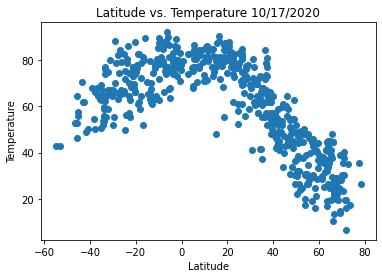

<Figure size 432x288 with 0 Axes>

In [81]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Max Temp']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Temperature {Date}")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("../output_datafig1.png")

## Latitude vs. Humidity Plot

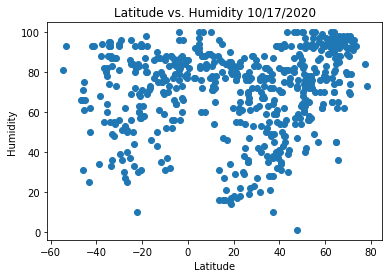

In [65]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Humidity']
plt.title(f"Latitude vs. Humidity {Date}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("../output_datafig2.png")

## Latitude vs. Cloudiness Plot

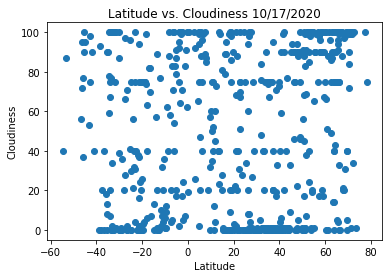

In [66]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Cloudiness']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Cloudiness {Date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_datafig3.png")

## Latitude vs. Wind Speed Plot

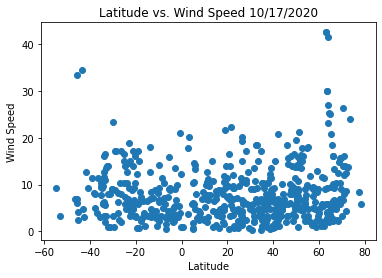

In [67]:
x_values=clean_dataframe ['lat']
y_values=clean_dataframe['Wind Speed']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Wind Speed {Date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_datafig4.png")

## Linear Regression

In [68]:
#What are we doing for linear regression? Check x and y values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(regress_values)

0      8.227053
1      8.403987
2      6.948206
3      7.322446
4      6.822053
         ...   
554    7.983477
555    7.855141
556    7.892973
557    7.540850
558    7.422408
Name: lat, Length: 559, dtype: float64


In [69]:
clean_dataframe['hemisphere']=np.where(clean_dataframe['lat']>0, 'north', 'South')
clean_dataframe


,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
0,Korla,41.76,86.15,55.00,43,99,4.00,CN,10/17/2020,north
1,Prince George,53.92,-122.75,30.20,74,1,5.82,CA,10/17/2020,north
2,Tuatapere,-46.13,167.68,53.01,66,95,7.00,NZ,10/17/2020,South
3,Mahébourg,-20.41,57.70,66.20,93,75,3.36,MU,10/17/2020,South
4,Ushuaia,-54.80,-68.30,42.80,81,40,9.17,AR,10/17/2020,South
...,...,...,...,...,...,...,...,...,...,...
554,Umluj,25.02,37.27,82.92,42,0,9.62,SA,10/17/2020,north
555,Rāichūr,16.20,77.37,78.08,77,79,8.79,IN,10/17/2020,north
556,Wanning,18.80,110.40,79.77,84,98,21.65,CN,10/17/2020,north
557,La Unión,-5.40,-80.75,67.46,72,91,8.99,PE,10/17/2020,South


In [70]:
north_dataframe=weather_data_df.copy()
north_dataframe=clean_dataframe.loc[~(clean_dataframe["hemisphere"]=="north")]
north_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
2,Tuatapere,-46.13,167.68,53.01,66,95,7.00,NZ,10/17/2020,South
3,Mahébourg,-20.41,57.70,66.20,93,75,3.36,MU,10/17/2020,South
4,Ushuaia,-54.80,-68.30,42.80,81,40,9.17,AR,10/17/2020,South
6,Broken Hill,-31.95,141.43,59.00,54,75,13.87,AU,10/17/2020,South
9,Mataura,-46.19,168.86,53.01,66,72,7.00,NZ,10/17/2020,South
...,...,...,...,...,...,...,...,...,...,...
545,Bloemhof,-27.65,25.61,65.80,27,28,8.10,ZA,10/17/2020,South
546,Quelimane,-17.88,36.89,64.49,93,6,2.24,MZ,10/17/2020,South
551,Barão de Melgaço,-16.19,-55.97,89.60,46,7,1.12,BR,10/17/2020,South
557,La Unión,-5.40,-80.75,67.46,72,91,8.99,PE,10/17/2020,South


In [71]:
south_dataframe=weather_data_df.copy()
south_dataframe=clean_dataframe.loc[~(clean_dataframe["hemisphere"]=="South")]
south_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
0,Korla,41.76,86.15,55.00,43,99,4.00,CN,10/17/2020,north
1,Prince George,53.92,-122.75,30.20,74,1,5.82,CA,10/17/2020,north
5,Bosansko Grahovo,44.18,16.36,34.00,75,0,5.99,BA,10/17/2020,north
7,Yangi Marg`ilon,40.43,71.72,53.60,54,0,9.17,UZ,10/17/2020,north
8,Havøysund,71.00,24.66,30.20,92,100,8.05,NO,10/17/2020,north
...,...,...,...,...,...,...,...,...,...,...
552,Lebedinyy,58.52,125.52,15.91,94,100,6.33,RU,10/17/2020,north
553,Chumikan,54.72,135.31,30.79,92,100,17.85,RU,10/17/2020,north
554,Umluj,25.02,37.27,82.92,42,0,9.62,SA,10/17/2020,north
555,Rāichūr,16.20,77.37,78.08,77,79,8.79,IN,10/17/2020,north


In [72]:
def linearreg(x_val, y_val, x_label, y_label, posn, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,posn,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.show()

The r-squared is: 0.4245394520504975


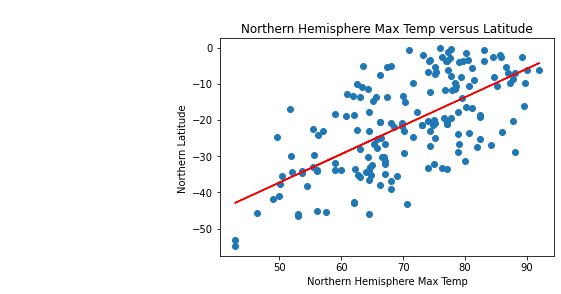

The r-value is: 0.006522785357208562


In [73]:
x_val= north_dataframe['Max Temp']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Max Temp')
y_label=('Northern Latitude ')
posn=(6,8)
Title= "Northern Hemisphere Max Temp versus Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.789431106445611


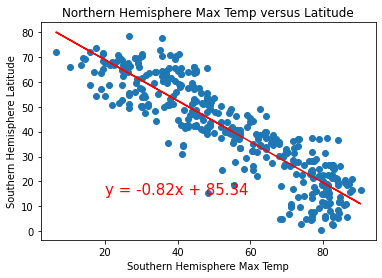

The r-value is: 0.006522785357208562


In [74]:
x_val= south_dataframe['Max Temp']
y_val=south_dataframe['lat']
x_label=('Southern Hemisphere Max Temp')
y_label=('Southern Hemisphere Latitude' )
posn=(20,15)
title="Southern Hemisphere Max Temp Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012640530836214131


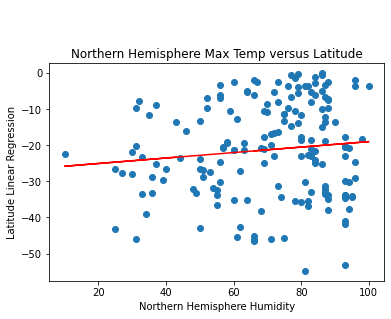

The r-value is: 0.006522785357208562


In [75]:
x_val= north_dataframe['Humidity']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Humidity')
y_label=('Latitude Linear Regression')
posn=(20,15)
plt.Title="Northern Hemisphere Humidity vs Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.058454696557629145


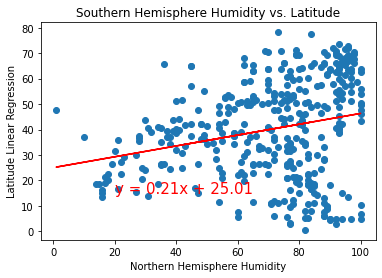

The r-value is: 0.006522785357208562


In [76]:
x_val= south_dataframe['Humidity']
y_val=south_dataframe['lat']
# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Humididty')
plt.ylabel('Southern Latitude Latitude Linear Regression')
posn=(20,15)
Title='Southern Hemisphere Humidity vs. Latitude'
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006955653150850684


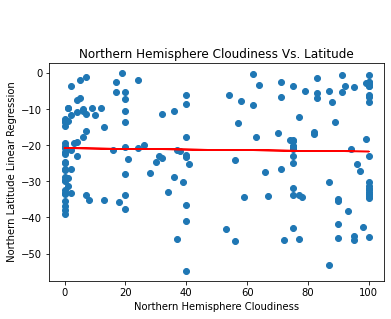

The r-value is: 0.006522785357208562


In [77]:
x_val= north_dataframe['Cloudiness']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Cloudiness')
y_label=(' Northern Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03633447721652826


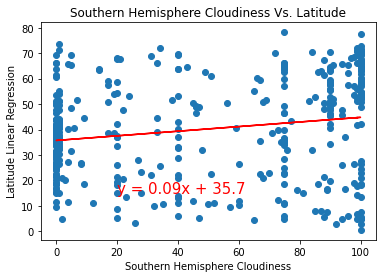

The r-value is: 0.006522785357208562


In [78]:
x_val=south_dataframe['Cloudiness']
y_val=south_dataframe['lat']
x_label=('Southern Hemisphere Cloudiness')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Southern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03633447721652826


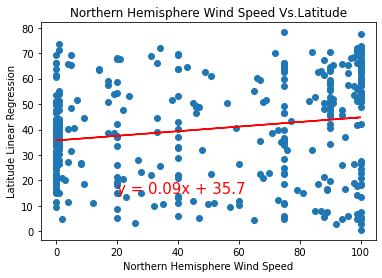

The r-value is: 0.006522785357208562


In [79]:
x_values= north_dataframe['Wind Speed']
y_values=north_dataframe['lat']
# Label plot and annotate the line equation
x_label=('Northern Hemisphere Wind Speed')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Wind Speed Vs.Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043068199407490675


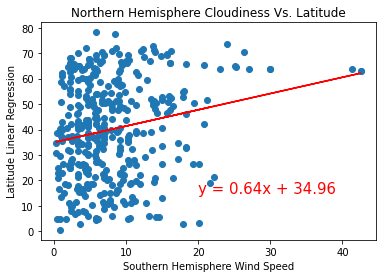

The r-value is: 0.006522785357208562


In [80]:
x_val=south_dataframe['Wind Speed']
y_val=south_dataframe['lat']
# Label plot and annotate the line equation
x_label=('Southern Hemisphere Wind Speed')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig12.png")


<Figure size 432x288 with 0 Axes>